In [76]:
from google.colab import drive
import sys
import os

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/Users/samuelhoman/Documents/STAT6289'

Mounted at /content/drive


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([4, 3, 32, 32])


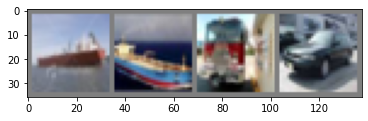

ship  ship  truck car  


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [66]:
import torch.nn as nn
import torch.nn.functional as F


class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net1 = Net1()

In [6]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = Net2()

In [84]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        self.dropout = nn.Dropout(0.5)
        x = F.relu(self.fc2(x))
        self.dropout = nn.Dropout(0.5)
        x = self.fc3(x)
        return x


net3 = Net3()

In [87]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer_net1 = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)
optimizer_net2 = optim.SGD(net2.parameters(), lr=0.01, momentum=0.9)
optimizer_net3 = optim.SGD(net3.parameters(), lr=0.01, momentum=0.9)

In [67]:
def accuracy_function(model):

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
  accuracy = (100* correct // total)
  return accuracy

In [68]:
list_net1 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net1.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(net1)

    list_net1.append(["Net1", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.305
[1,  6000] loss: 2.304
[1,  8000] loss: 2.303
[1, 10000] loss: 2.304
[1, 12000] loss: 2.304
Accuracy of the network on the 10000 test images: 9 %
[2,  2000] loss: 2.303
[2,  4000] loss: 2.304
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.304
[2, 12000] loss: 2.303
Accuracy of the network on the 10000 test images: 9 %
Finished Training


In [ ]:
import os

scores['cnn_sig'] = pd.Series(cnn_sig_accuracy)
scores.to_pickle(os.path.join(abspath_curr, f'/scores.pkl'))

PATH = os.path.join(abspath_curr, '/cnn_sig.pth')
torch.save(conv_sigmoid.state_dict(), PATH)

In [78]:
list_net2 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net2.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(net2)

    list_net2.append(["Net2", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.310
[1,  4000] loss: 2.310
[1,  6000] loss: 2.309
[1,  8000] loss: 2.309
[1, 10000] loss: 2.308
[1, 12000] loss: 2.307
Accuracy of the network on the 10000 test images: 10 %
[2,  2000] loss: 2.307
[2,  4000] loss: 2.307
[2,  6000] loss: 2.306
[2,  8000] loss: 2.306
[2, 10000] loss: 2.305
[2, 12000] loss: 2.306
Accuracy of the network on the 10000 test images: 10 %
Finished Training


In [88]:
list_net3 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net3.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(net2)

    list_net3.append(["Net3", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.306
[1,  4000] loss: 2.306
[1,  6000] loss: 2.307
[1,  8000] loss: 2.306
[1, 10000] loss: 2.306
[1, 12000] loss: 2.307
Accuracy of the network on the 10000 test images: 10 %
Finished Training


In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [91]:
class Model0(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(3072, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = self.linear(x)
    return x
  
model0 = Model0()

In [48]:
class Model1(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer(x)

    return x

model1 = Model1()

In [49]:
class Model2(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer1 = nn.Linear(512, 512)
      self.hiddenlayer2 = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer1(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer2(x)

    return x

model2 = Model2()

In [51]:
class Model3(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer1 = nn.Linear(512, 512)
      self.hiddenlayer2 = nn.Linear(512, 512)
      self.hiddenlayer3 = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer1(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer2(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer3(x)

    return x

model3 = Model3()

In [50]:
class Model4(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer1 = nn.Linear(512, 512)
      self.hiddenlayer2 = nn.Linear(512, 512)
      self.hiddenlayer3 = nn.Linear(512, 512)
      self.hiddenlayer4 = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer1(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer2(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer3(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer4(x)

    return x

model4 = Model4()

In [92]:
optimizer_model0 = optim.SGD(model0.parameters(), lr=0.001, momentum=0.9)
optimizer_model1 = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)
optimizer_model2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
optimizer_model3 = optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)
optimizer_model4 = optim.SGD(model4.parameters(), lr=0.001, momentum=0.9)

In [34]:
def accuracy_function(model):

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
  accuracy = (100* correct // total)
  return accuracy

In [93]:
list_model0 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model0.zero_grad()

        # forward + backward + optimize
        outputs = model0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model0.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model0)

    list_model0.append(["Model0", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.173
[1,  4000] loss: 2.185
[1,  6000] loss: 2.173
[1,  8000] loss: 2.147
[1, 10000] loss: 2.114
[1, 12000] loss: 2.147
Accuracy of the network on the 10000 test images: 33 %
[2,  2000] loss: 2.069
[2,  4000] loss: 2.107
[2,  6000] loss: 2.111
[2,  8000] loss: 2.112
[2, 10000] loss: 2.153
[2, 12000] loss: 2.117
Accuracy of the network on the 10000 test images: 33 %
Finished Training


In [40]:
list_model1 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model1.zero_grad()

        # forward + backward + optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model1)

    list_model1.append(["Model1", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 1.754
[1,  4000] loss: 1.771
[1,  6000] loss: 1.769
[1,  8000] loss: 1.774
[1, 10000] loss: 1.782
[1, 12000] loss: 1.773
Accuracy of the network on the 10000 test images: 38 %
[2,  2000] loss: 1.751
[2,  4000] loss: 1.768
[2,  6000] loss: 1.737
[2,  8000] loss: 1.747
[2, 10000] loss: 1.764
[2, 12000] loss: 1.750
Accuracy of the network on the 10000 test images: 38 %
Finished Training


In [47]:
list_model2 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model2.zero_grad()

        # forward + backward + optimize
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model2)

    list_model2.append(["Model2", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.301
[1,  4000] loss: 2.302
[1,  6000] loss: 2.302
[1,  8000] loss: 2.301
[1, 10000] loss: 2.302
[1, 12000] loss: 2.302
Accuracy of the network on the 10000 test images: 11 %
[2,  2000] loss: 2.302
[2,  4000] loss: 2.302
[2,  6000] loss: 2.302
[2,  8000] loss: 2.301
[2, 10000] loss: 2.301
[2, 12000] loss: 2.302
Accuracy of the network on the 10000 test images: 11 %
Finished Training


In [52]:
list_model3 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model3.zero_grad()

        # forward + backward + optimize
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model3.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model3)

    list_model3.append(["Model3", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.302
[1,  6000] loss: 2.303
[1,  8000] loss: 2.304
[1, 10000] loss: 2.303
[1, 12000] loss: 2.303
Accuracy of the network on the 10000 test images: 10 %
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2, 12000] loss: 2.303
Accuracy of the network on the 10000 test images: 10 %
Finished Training


In [ ]:
list_model4 = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model4.zero_grad()

        # forward + backward + optimize
        outputs = model4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model4.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model4)

    list_model4.append(["Model4", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.171
[1,  4000] loss: 1.855
[1,  6000] loss: 1.732
[1,  8000] loss: 1.671
[1, 10000] loss: 1.621
[1, 12000] loss: 1.580
Accuracy of the network on the 10000 test images: 46 %
[2,  2000] loss: 1.505
[2,  4000] loss: 1.476
[2,  6000] loss: 1.452
[2,  8000] loss: 1.459
[2, 10000] loss: 1.432


In [80]:
list_models0_4 = [list_net1, list_net2, list_net3, list_model0, list_model1, list_model2, list_model3, list_model4]

In [95]:
import pandas as pd
model_results = pd.DataFrame()
for model in list_models0_4:
  scores = []
  name = model[0][0]
  for epoch in model:
    scores.append(epoch[2])
  model_results[name] = pd.Series(scores)

model_results.head()

,Net1,net2,Model0,Model1,Model2,Model3,Model4
0,9,10,31,38,11,10,46
1,9,10,32,38,11,10,50


In [96]:
cnn_epochs = [1,2]

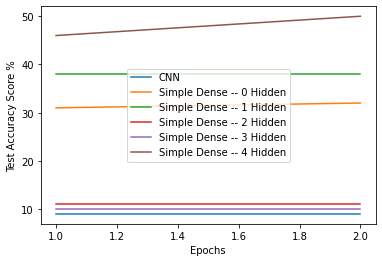

In [98]:
plt.plot(cnn_epochs, model_results['Net1'], label = 'CNN')
plt.plot(cnn_epochs, model_results['Model0'], label = 'Simple Dense -- 0 Hidden')
plt.plot(cnn_epochs, model_results['Model1'], label = 'Simple Dense -- 1 Hidden')
plt.plot(cnn_epochs, model_results['Model2'], label = 'Simple Dense -- 2 Hidden')
plt.plot(cnn_epochs, model_results['Model3'], label = 'Simple Dense -- 3 Hidden')
plt.plot(cnn_epochs, model_results['Model4'], label = 'Simple Dense -- 4 Hidden')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.legend()
plt.show()

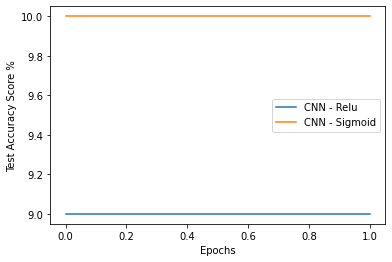

In [83]:
plt.plot(cnn_epochs, model_results['Net1'], label = 'CNN - Relu')
plt.plot(cnn_epochs, model_results['Net2'], label = 'CNN - Sigmoid')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.legend()
plt.show()

In [ ]:
plt.plot(cnn_epochs, model_results['Net1'], label = 'CNN - No Dropout, No Augmentation')
plt.plot(cnn_epochs, model_results['Net3'], label = 'CNN - Dropout, No Augmentation')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.legend()
plt.show()

In [94]:
list_model0

[['Model0', 1, 33], ['Model0', 2, 33]]